In [166]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms
import time
import mediapy as media

In [3]:
# Download and load the training set
train_dataset = datasets.MNIST(root='/home/zach/intelligent_machines/data', train=True, download=False)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Download and load the test set
test_dataset = datasets.MNIST(root='/home/zach/intelligent_machines/data', train=False, download=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

train_images = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()

test_images = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()

print(train_images.shape)

(60000, 28, 28)


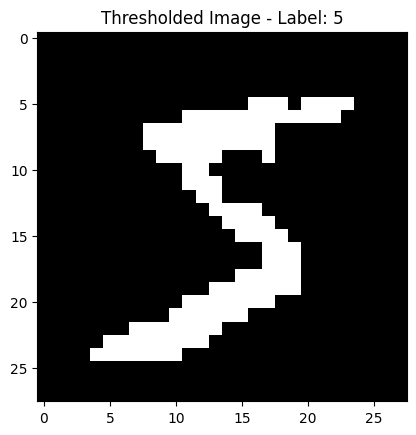

[[-1.  1.  1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  1.  1.  1. -1. -1. -1. -1. -1. -1.]
 [-1. -1.  1.  1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1.  1.  1.  1.  1. -1. -1. -1.]
 [-1. -1. -1. -1.  1.  1.  1.  1. -1. -1.]
 [-1. -1. -1. -1. -1.  1.  1.  1.  1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  1.  1.  1.]
 [-1. -1. -1. -1. -1. -1. -1.  1.  1.  1.]
 [-1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]
 [-1. -1. -1.  1.  1.  1.  1.  1.  1.  1.]]


In [4]:
threshold_value = 100  # Pixel intensity threshold (0-255)
train_images = np.where(train_images > threshold_value, 1.0, -1.0)
test_images = np.where(test_images > threshold_value, 1.0, -1.0)

plt.imshow(train_images[0], cmap='gray')
plt.title(f'Thresholded Image - Label: {train_labels[0]}')
plt.show()

print(train_images[0][10:20, 10:20])


In [10]:
data = train_images[:1]

n_nodes = data.shape[1] * data.shape[2]

batch_size = 1

num_iter = data.shape[0] // batch_size

# Initialize weight matrix
weight = np.zeros((n_nodes, n_nodes))

print(data.shape)
print(weight.shape)
print(f"num iters: {num_iter}")

(1, 28, 28)
(784, 784)
num iters: 1


In [12]:
# Process in batches

for i in range(0, num_iter):
    batch = data[i*batch_size:i*batch_size + batch_size].reshape(batch_size, -1, 1)
    
    inner_product = np.matmul(batch, batch.transpose(0, 2, 1))

    weight += np.sum(inner_product, axis=0)

# # Zero out the diagonal
weight[np.eye(n_nodes, dtype=bool)] = 0

print(weight[:10,:10])


[[0. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 0. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 0. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 0. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 0. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 0. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 0. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 0. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 0. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 0.]]


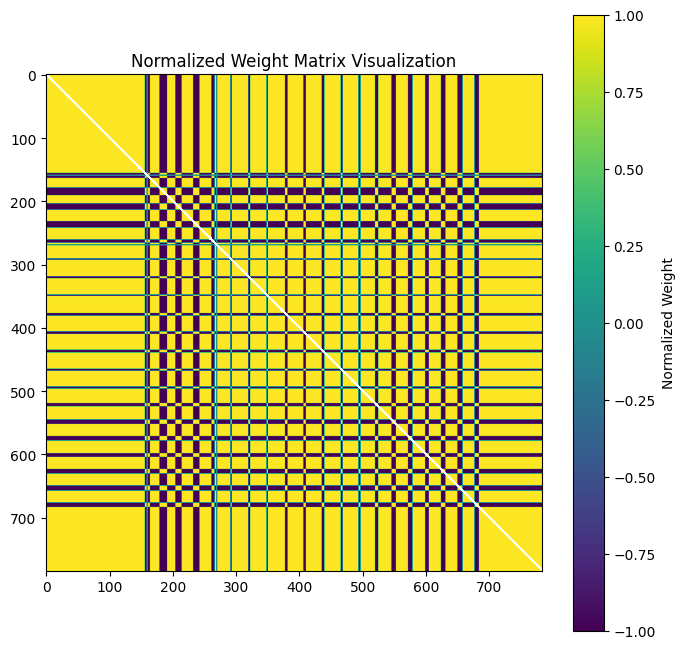

[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]


In [13]:
W_norm = weight / weight.max()

viz_img = np.copy(W_norm)
np.fill_diagonal(viz_img, np.nan)

# Visualize the weight matrix
plt.figure(figsize=(8, 8))
plt.imshow(viz_img, cmap='viridis')
plt.colorbar(label='Normalized Weight')
plt.title('Normalized Weight Matrix Visualization')
plt.show()
print(W_norm)

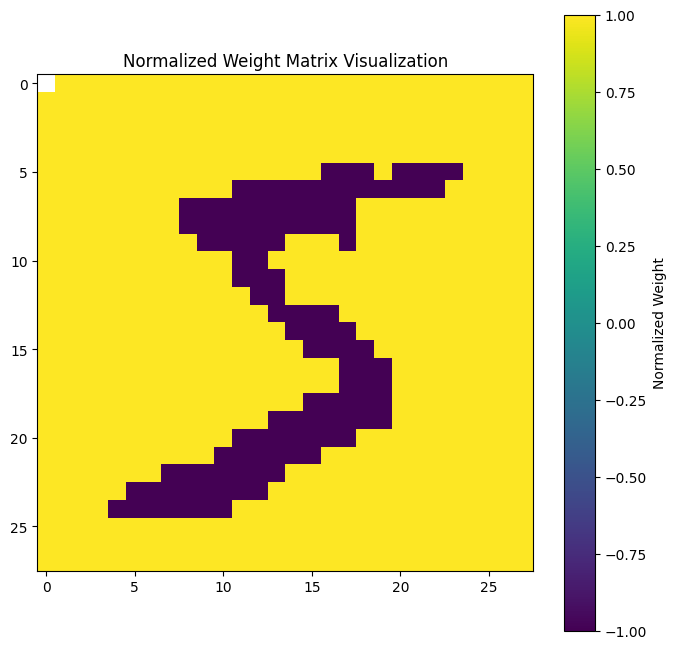

In [14]:
# Visualize the weight matrix
plt.figure(figsize=(8, 8))
plt.imshow(viz_img[0,:].reshape(data.shape[1], data.shape[2]), cmap='viridis')
plt.colorbar(label='Normalized Weight')
plt.title('Normalized Weight Matrix Visualization')
plt.show()

(784, 784)
[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]


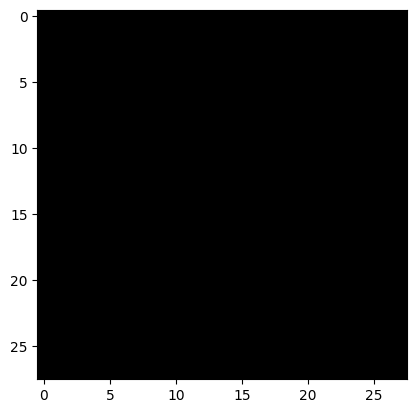

In [170]:
random_img = np.ones((data.shape[1],data.shape[2])) * -1
random_img_flat = random_img.reshape(-1,1)
network =  random_img_flat @ random_img_flat.T
print(network.shape)
plt.imshow(random_img, cmap='gray')
frames = []
print(random_img[:10,:10])


In [127]:
node = np.random.choice(n_nodes, 1)[0]
print(f"Selected Node {node}")

energy_curr = -1 * network[node,:] @ W_norm[node,:]
energy_flip = network[node,:] @ W_norm[node,:] # -1 * -1 = 1

if energy_flip < energy_curr:
    print(f"Energy Before: {-1 * np.sum(network * W_norm)}")

    network[node,:] *= -1
    network[:,node] *= -1

    row_j = node // data.shape[1]
    col_j = node % data.shape[1]
    random_img[row_j, col_j] *= -1
    # random_img[col_j, row_j] *= -1

    print(f"Energy After: {-1 * np.sum(network * W_norm)}")
    plt.imshow(random_img, cmap='gray')
    plt.show()
else:
    print("No change")

Selected Node 98
No change


In [176]:

for _ in range(1000):

    node = np.random.choice(n_nodes, 1)[0]
    # print(f"Selected Node {node}")

    energy_curr = -1 * network[node,:] @ W_norm[node,:]
    energy_flip = network[node,:] @ W_norm[node,:] # -1 * -1 = 1

    if energy_flip < energy_curr:
        # print(f"Energy Before: {-1 * np.sum(network * W_norm)}")

        network[node,:] *= -1
        network[:,node] *= -1

        row_j = node // data.shape[1]
        col_j = node % data.shape[1]
        random_img[row_j, col_j] *= -1
        # random_img[col_j, row_j] *= -1
        frames.append(np.copy(random_img))
        print(f"Energy: {-1 * np.sum(network * W_norm)}")
        # plt.imshow(random_img, cmap='gray')
        # plt.show()
        # break
    else:
        pass
        # print("No change")

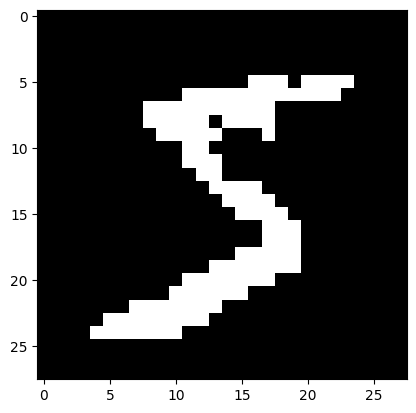

In [177]:
plt.imshow(random_img, cmap='gray')


In [165]:
print(len(frames))
F = np.array(frames)
print(F.shape)
# print(np.std(F, axis=0))
print(np.sum(np.std(F, axis=0)))


82
(82, 28, 28)
64.31088919929832


In [178]:
# media.resize_video
media.show_video(frames, height=800, fps=20)